In [1]:
import tensorflow as tf

2023-09-27 16:52:02.737667: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-27 16:52:02.782544: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-09-27 16:52:02.782583: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-09-27 16:52:02.782618: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-27 16:52:02.790685: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-27 16:52:02.791225: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#get data
!wget -c https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-09-27 16:56:39--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-09-27 16:56:40 (39.9 MB/s) - ‘moore.csv’ saved [2302/2302]



In [8]:
!head ./moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [9]:
data=pd.read_csv('moore.csv', header=None).to_numpy()

In [10]:
type(data)

numpy.ndarray

In [11]:
data.shape

(162, 2)

In [40]:
X=data[:,0].reshape(-1,1) #N x D
y=data[:,1]

In [41]:
X.shape

(162, 1)

In [42]:
y.shape

(162,)

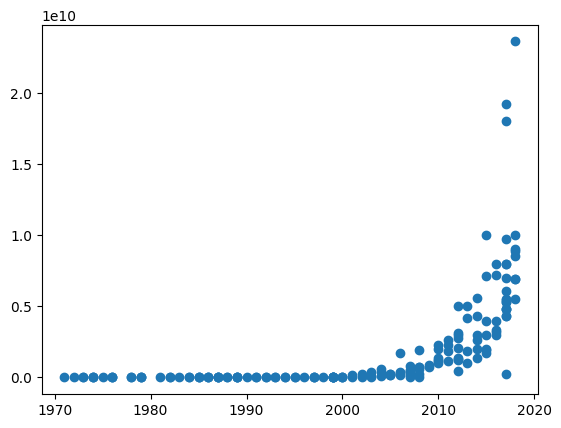

In [44]:
plt.scatter(X, y)

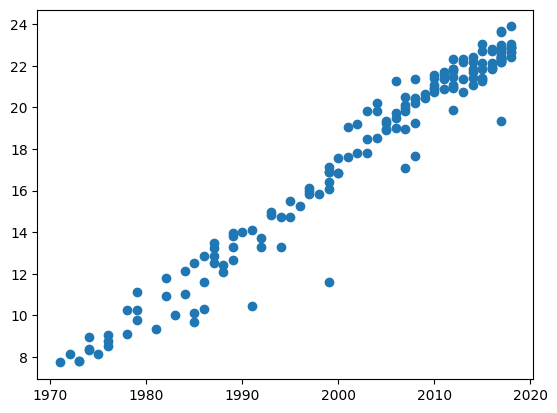

In [45]:
Y=np.log(y)
plt.scatter(X,Y)

In [46]:
X=X-X.mean()

In [47]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

In [48]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
    loss='mse',
)

In [49]:
def schedule(epoch, lr):
    if epoch>=50: 
        return .0001
    return .001

In [50]:
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [51]:
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 4ms/step - loss: 452.6579 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 488.3139 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 403.9322 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 283.5904 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 157.8064 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 119.0507 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 92.3611 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 67.0189 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 44.2594 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 33.2644 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - loss: 2

6/6 [==============================] - 0s 3ms/step - loss: 0.8846 - lr: 1.0000e-04
Epoch 89/200
6/6 [==============================] - 0s 4ms/step - loss: 0.8763 - lr: 1.0000e-04
Epoch 90/200
6/6 [==============================] - 0s 4ms/step - loss: 0.8832 - lr: 1.0000e-04
Epoch 91/200
6/6 [==============================] - 0s 3ms/step - loss: 0.8671 - lr: 1.0000e-04
Epoch 92/200
6/6 [==============================] - 0s 3ms/step - loss: 0.8742 - lr: 1.0000e-04
Epoch 93/200
6/6 [==============================] - 0s 3ms/step - loss: 0.8776 - lr: 1.0000e-04
Epoch 94/200
6/6 [==============================] - 0s 3ms/step - loss: 0.8828 - lr: 1.0000e-04
Epoch 95/200
6/6 [==============================] - 0s 4ms/step - loss: 0.8734 - lr: 1.0000e-04
Epoch 96/200
6/6 [==============================] - 0s 3ms/step - loss: 0.8703 - lr: 1.0000e-04
Epoch 97/200
6/6 [==============================] - 0s 3ms/step - loss: 0.8734 - lr: 1.0000e-04
Epoch 98/200
6/6 [==============================] - 0

6/6 [==============================] - 0s 4ms/step - loss: 0.8740 - lr: 1.0000e-04
Epoch 173/200
6/6 [==============================] - 0s 4ms/step - loss: 0.8807 - lr: 1.0000e-04
Epoch 174/200
6/6 [==============================] - 0s 3ms/step - loss: 0.8733 - lr: 1.0000e-04
Epoch 175/200
6/6 [==============================] - 0s 3ms/step - loss: 0.8705 - lr: 1.0000e-04
Epoch 176/200
6/6 [==============================] - 0s 3ms/step - loss: 0.8754 - lr: 1.0000e-04
Epoch 177/200
6/6 [==============================] - 0s 3ms/step - loss: 0.8969 - lr: 1.0000e-04
Epoch 178/200
6/6 [==============================] - 0s 3ms/step - loss: 0.9320 - lr: 1.0000e-04
Epoch 179/200
6/6 [==============================] - 0s 3ms/step - loss: 0.8797 - lr: 1.0000e-04
Epoch 180/200
6/6 [==============================] - 0s 3ms/step - loss: 0.8866 - lr: 1.0000e-04
Epoch 181/200
6/6 [==============================] - 0s 3ms/step - loss: 0.8760 - lr: 1.0000e-04
Epoch 182/200
6/6 [=========================

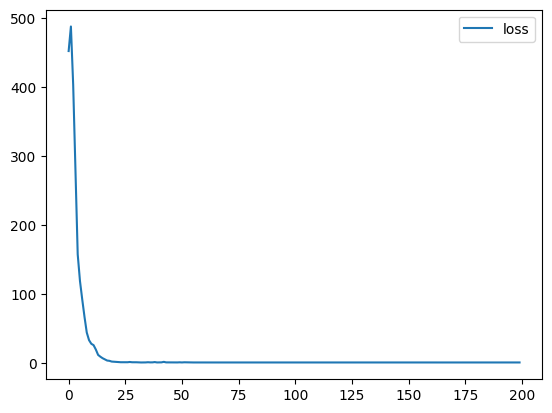

In [52]:
#plot the loss
plt.plot(r.history['loss'], label='loss')
plt.legend()

In [53]:
model.layers

In [54]:
model.layers[0].get_weights()

[array([[0.32549992]], dtype=float32), array([17.765316], dtype=float32)]

In [56]:
a = model.layers[0].get_weights()[0][0,0]
a

0.32549992

In [58]:
print("Time to double: ", np.log(2)/a)

Time to double:  2.12948493573184


In [59]:
Yhat = model.predict(X).flatten()

6/6 [==============================] - 0s 2ms/step


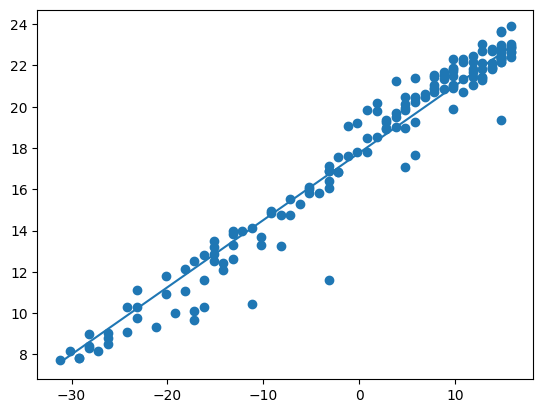

In [60]:
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [61]:
w, b = model.layers[0].get_weights()

#reshape as it was flattened earlier
X =  X.reshape(-1,1)
Yhat2 = (X.dot(w) + b).flatten()
np.allclose(Yhat, Yhat2)

True